# 🧪 Activity: Turning Images into Data

In this notebook, we will:
- Load public-domain images (ice cream and apple)
- Convert them to numerical arrays
- Extract simple features
- Build a simple pixel-based classifier

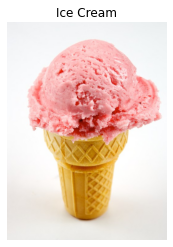

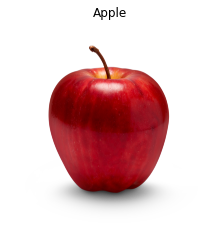

In [1]:
# Step 1: Load and display images
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Helper function to show an image
def show_image(path, title="Image"):
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()
    return img

ice = show_image("ice_cream.jpg", "Ice Cream")
apple = show_image("apple.png", "Apple")


In [2]:
# Step 2: Convert to grayscale and numeric arrays
def preprocess(img, size=(100, 100)):
    img = img.convert("L").resize(size)
    arr = np.array(img)
    return arr

ice_arr = preprocess(ice)
apple_arr = preprocess(apple)

print("Ice image array shape:", ice_arr.shape)
print("Apple image array shape:", apple_arr.shape)

print("Data matrix for ice cream image (grayscale):")
print(ice_arr)

# Show just a smaller portion (e.g. top-left 10×10)
print("Top-left 10x10 pixel values:")
print(ice_arr[:10, :10])

Ice image array shape: (100, 100)
Apple image array shape: (100, 100)
Data matrix for ice cream image (grayscale):
[[239 239 239 ... 237 237 237]
 [240 240 240 ... 238 238 238]
 [241 241 241 ... 239 239 239]
 ...
 [235 235 234 ... 226 226 226]
 [235 235 235 ... 226 226 226]
 [235 235 235 ... 226 226 226]]
Top-left 10x10 pixel values:
[[239 239 239 239 239 239 240 241 241 241]
 [240 240 240 240 240 240 241 241 241 242]
 [241 241 241 240 240 240 241 241 241 241]
 [241 241 241 241 241 241 241 241 241 241]
 [242 242 242 242 242 242 242 241 241 242]
 [242 242 242 242 242 242 243 243 243 243]
 [243 243 243 243 243 243 244 244 244 244]
 [243 244 244 243 244 244 244 245 245 245]
 [243 244 244 244 244 244 244 245 245 245]
 [244 244 244 244 244 245 245 245 245 245]]


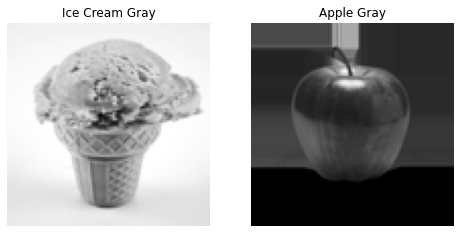

In [3]:
# Visualize grayscale versions
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(ice_arr, cmap='gray')
plt.title("Ice Cream Gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(apple_arr, cmap='gray')
plt.title("Apple Gray")
plt.axis('off')
plt.show()

In [4]:
# Step 3: Simple feature extraction
def avg_pixel(arr):
    return arr.mean()

#data = {
#    "Image": ["ice_cream", "apple"],
#    "AvgPixel": [avg_pixel(ice_arr), avg_pixel(apple_arr)],
#}


data = {
    "Image": ["ice_cream", "apple"],
    "MedianPixel": [np.median(ice_arr), np.median(apple_arr)],
}


df = pd.DataFrame(data)
print(df)

       Image  MedianPixel
0  ice_cream        231.0
1      apple         39.0


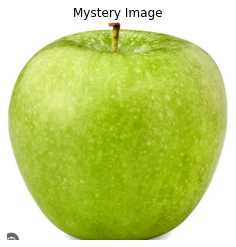

The mystery image is more like: ice cream (median pixel 176.0)


In [5]:
# Step 4: Classify a mystery image
mystery = show_image("mystery.jpg", "Mystery Image")
m_arr = preprocess(mystery)
m_median = np.median(m_arr)

# Compare with known medians
dist_ice = abs(m_median - df.loc[0, "MedianPixel"])
dist_apple = abs(m_median - df.loc[1, "MedianPixel"])

label = "ice cream" if dist_ice < dist_apple else "apple"
print(f"The mystery image is more like: {label} (median pixel {m_median:.1f})")